# Data-Analysis (Week4)
### Investigating a Dataset

## 1.Imports ##

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Reading csv file into a dataframe ##

In [70]:
titanic_df = pd.read_csv('titanic_data.csv')

In [71]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.Cleaning the data

### Since the column cabin has a lot of null values the best practice would be to remove it from the dataframe

In [73]:
titanic_df.drop(columns = ['Cabin'],inplace=True)

### Columns Embarked and Age have some null values so we can fix that by replacing them with non-null values

In [74]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S') # Since people embarked from Southampton the most
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [75]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### Great we don't have any null values anymore! ###

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 4. Exploration!

### No of males and females present on the ship ##

In [77]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Finding mean age of passengers who survived

In [78]:
survived_passengers = titanic_df[titanic_df['Survived'] == 1]
n_survived_passengers = titanic_df[titanic_df['Survived'] == 0]

In [79]:
survived_passengers['Age'].mean()

28.54977812177503

In [80]:
n_survived_passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.415100,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.457370,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,29.699118,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


### People embarked from three places ##
- Southampton - 644
- Cherbourg - 168
- Queenstown - 77

S    646
C    168
Q     77
Name: Embarked, dtype: int64

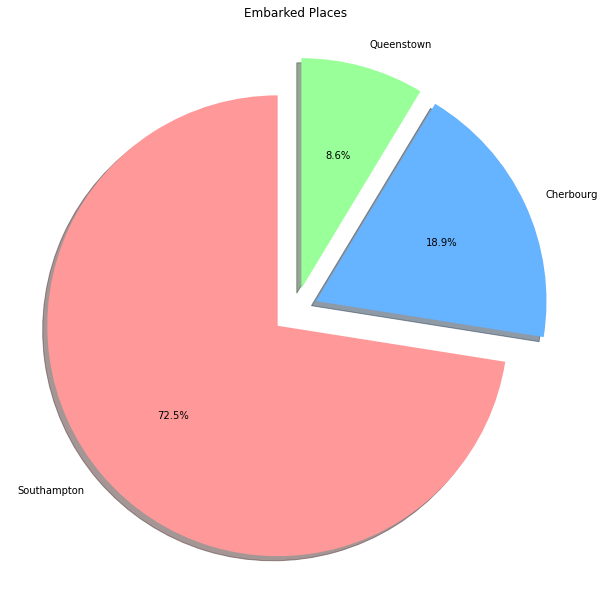

In [81]:
embarked_places = titanic_df['Embarked'].value_counts(sort=False)
data = list(embarked_places.values)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Southampton','Cherbourg','Queenstown']
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(4,4,6,6)
explode = (0.1, 0.1, 0.1)
ax1.pie(data, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Embarked Places')
titanic_df['Embarked'].value_counts(sort=False)

### Majority of people were from Southampton.###
- So did they survive more as a result?
- Let's see!

Text(0.5, 1.0, 'Survival rates of different cities')

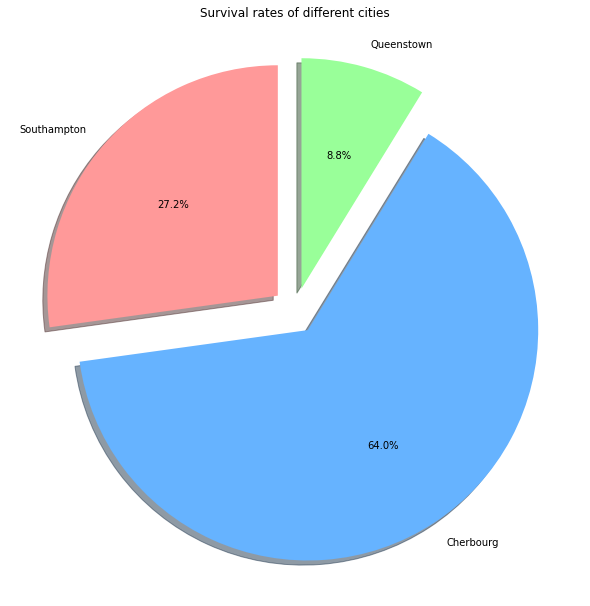

In [82]:
s_data = list(survived_people['Embarked'].value_counts(sort=False).values)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Southampton','Cherbourg','Queenstown']
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(4,4,6,6)
explode = (0.1, 0.1, 0.1)
ax1.pie(s_data, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Survival rates of different cities')

### Notice the Pie-Chart ###
- Southampton does have the highest survival rates if we consider total no of people who   survived. 
- But still since Southampton has most no of people so they might have the most no of survived cases 
- A better way would be compare the survived people versus non-survived people for each city to see who actually wins

In [83]:
labels = ["Not Survived", "Survived"]
surv_list_southampton = titanic_df[titanic_df['Embarked']=='S']['Survived'].value_counts(sort=False)
surv_list_cher = titanic_df[titanic_df['Embarked']=='C']['Survived'].value_counts(sort=False)
surv_list_queens = titanic_df[titanic_df['Embarked']=='Q']['Survived'].value_counts(sort=False)
data_s = list(surv_list_southampton.values)
label_s = labels
data_c = list(surv_list_cher.values)
label_c = labels
data_q = list(surv_list_queens.values)
label_q = labels

surv_list_queens

0    47
1    30
Name: Survived, dtype: int64

<ipython-input-84-29707cc0e21c>:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(4,4,6,6)


Text(0.5, 1.0, 'Queenstown')

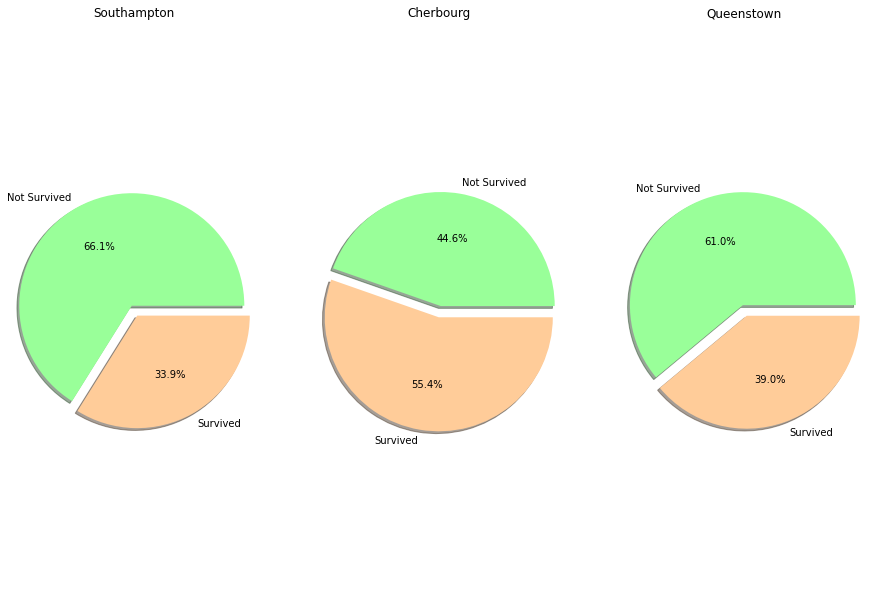

In [84]:
colors = ['#99ff99','#ffcc99']
explode = (0,0.1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,constrained_layout=True)
fig.subplots_adjust(4,4,6,6)
ax1.pie(data_s,labels=label_s,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax2.pie(data_c,labels=label_c,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax3.pie(data_q,labels=label_q,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax1.axis('equal')  
ax2.axis('equal')  
ax3.axis('equal')
ax1.set_title('Southampton')
ax2.set_title('Cherbourg')
ax3.set_title('Queenstown')

### The results are interesting ###
- Southampton actually has the worst survival rate when compared city wise
- Cherbourg on the other hand has most survival percentage

### Did Passenger classes that were higher cause more survival rates? ###
- Let's find out!

In [85]:
class_list = list(survived_passengers['Pclass'].value_counts(sort=False).values)
n_class_list = list(n_survived_passengers['Pclass'].value_counts(sort=False).values)
class_1=[class_list[0],n_class_list[0]]
class_2=[class_list[1],n_class_list[1]]
class_3=[class_list[2],n_class_list[2]]
class_3


[119, 372]

<ipython-input-86-dc40a9e70915>:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  class_fig.subplots_adjust(4,4,6,6)


Text(0.5, 1.0, 'Survival vs Non-Survival of Class3')

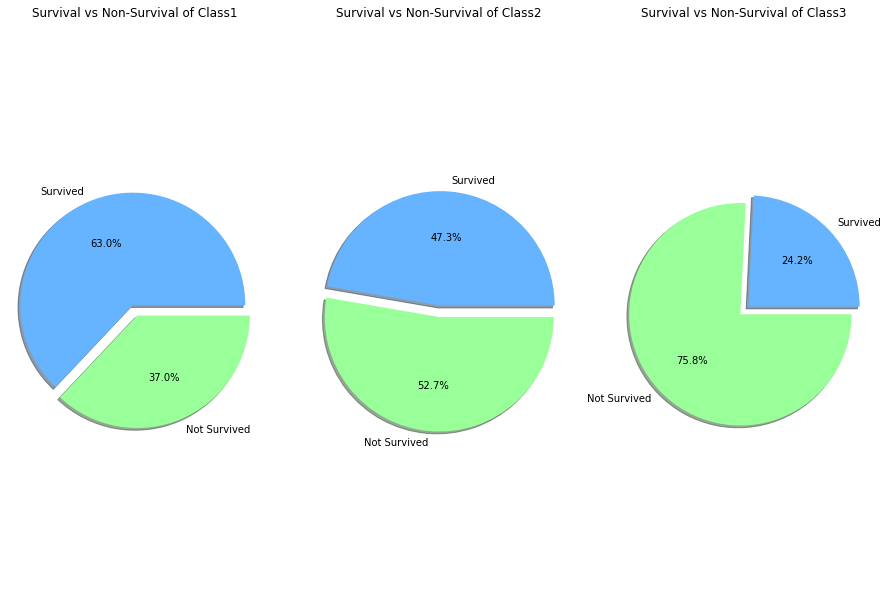

In [86]:
colors = ['#66b3ff','#99ff99']
explode = (0.1,0)
labels_class = ["Survived","Not Survived"]
class_fig, (ax1, ax2, ax3) = plt.subplots(1, 3,constrained_layout=True)
class_fig.subplots_adjust(4,4,6,6)
ax1.pie(class_1,labels=labels_class,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax2.pie(class_2,labels=labels_class,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax3.pie(class_3,labels=labels_class,autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
ax1.axis('equal')  
ax1.set_title('Survival vs Non-Survival of Class1')
ax2.axis('equal')  
ax2.set_title('Survival vs Non-Survival of Class2')
ax3.axis('equal')
ax3.set_title('Survival vs Non-Survival of Class3')


### From the 3 graphs we can conclude that
- People who bought Class1 tickets had a better chance of survival
- People who bought Class3 tickets had worst percentage of survival
- In all we can conclude that Class did had a role in survival percentages

### Trying to find relations between embarked places and Number of Parents/Children Aboard

<ipython-input-87-8796c86b5b51>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parch_c = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='C']['Parch']
<ipython-input-87-8796c86b5b51>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parch_s = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='S']['Parch']
<ipython-input-87-8796c86b5b51>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parch_q = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='Q']['Parch']


Text(0.5, 1.0, 'Number of Parents/Children Abroad')

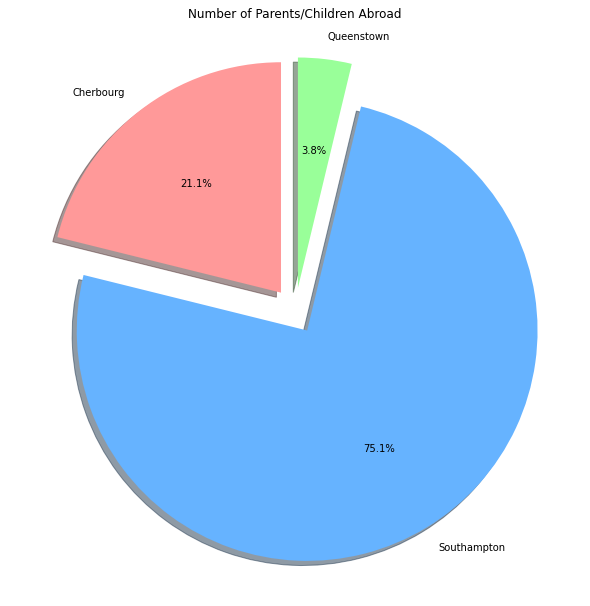

In [87]:
parch_c = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='C']['Parch']
parch_s = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='S']['Parch']
parch_q = titanic_df[titanic_df['Parch']>0][titanic_df['Embarked']=='Q']['Parch']

data = [parch_c.count(),parch_s.count(),parch_q.count()]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Cherbourg','Southampton','Queenstown']
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(4,4,6,6)
explode = (0.1, 0.1, 0.1)
ax1.pie(data, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Number of Parents/Children Abroad')

### We can see that. ###
- Southampton had most number of parents/children abroad
- Queenstown had the least amount
- Similar analysis could be done for siblings as well

### Trying to find relation between embarked places and siblings

<ipython-input-88-397498c24595>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sib_c = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='C']['Parch']
<ipython-input-88-397498c24595>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sib_s = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='S']['Parch']
<ipython-input-88-397498c24595>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sib_q = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='Q']['Parch']


Text(0.5, 1.0, 'Number of Siblings/Spouses Abroad')

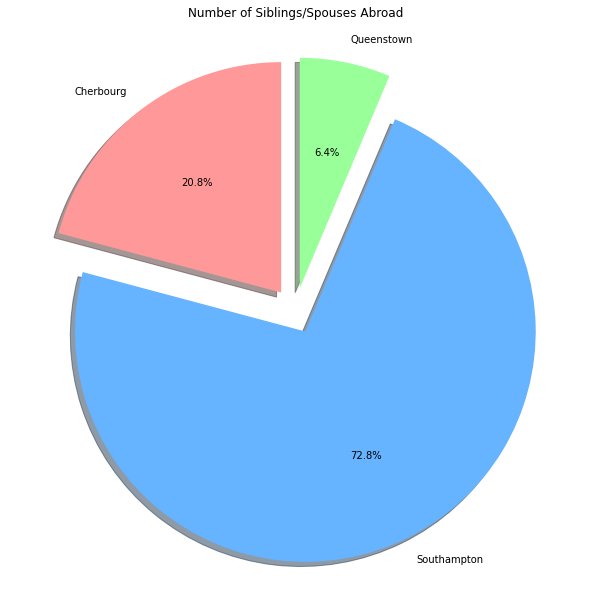

In [88]:
sib_c = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='C']['Parch']
sib_s = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='S']['Parch']
sib_q = titanic_df[titanic_df['SibSp']>0][titanic_df['Embarked']=='Q']['Parch']

data = [sib_c.count(),sib_s.count(),sib_q.count()]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Cherbourg','Southampton','Queenstown']
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(4,4,6,6)
explode = (0.1, 0.1, 0.1)
ax1.pie(data, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Number of Siblings/Spouses Abroad')

### Correlation between attributes

<AxesSubplot:>

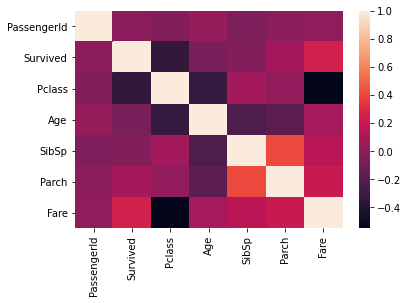

In [89]:
sns.heatmap(titanic_df.corr())

### Scatterplot of Fare vs Passenger Classes

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

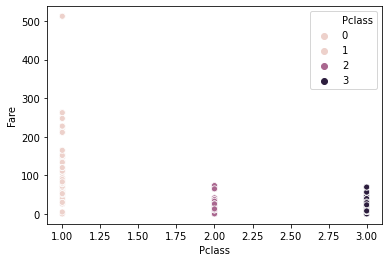

In [90]:
sns.scatterplot(data = titanic_df[['Fare','Pclass']],x='Pclass',y='Fare',hue = 'Pclass',)